In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
csv_in = 'iris.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=2, header=0)
print(df.shape)
print(df.info())
display(df.head())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_data = df.loc[:, ['sepal_len', 'sepal_width']]
print(df_data.shape)
display(df_data.head())
iris = df_data.index

(150, 2)


,sepal_len,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
Z = linkage(df_data, method='ward', metric='euclidean')
n_data = Z.shape[0]
df_Z = pd.DataFrame(Z,
                    columns=['label1', 'label2',
                             'distance', '#members'],
                    index=['merged{}'.format(i+1+n_data) 
                           for i in range(n_data)])
df_Z['label1'] = df_Z['label1'].astype('int')
df_Z['label2'] = df_Z['label2'].astype('int')
df_Z['#members'] = df_Z['#members'].astype('int')
display(df_Z.head())
display(df_Z.tail())

,label1,label2,distance,#members
merged150,0,17,0.0,2
merged151,2,29,0.0,2
merged152,40,43,0.0,2
merged153,5,16,0.0,2
merged154,11,24,0.0,2


,label1,label2,distance,#members
merged294,278,285,2.587423,27
merged295,291,294,4.438798,56
merged296,290,293,4.689911,64
merged297,292,296,6.096858,94
merged298,295,297,11.686786,150


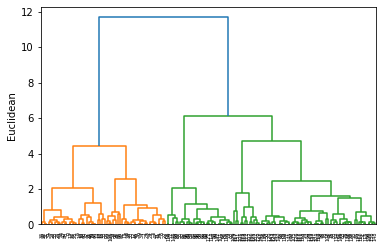

In [6]:
dendr = dendrogram(Z, labels=iris)
plt.xticks(rotation=90)
plt.ylabel('Euclidean')
plt.show()

In [7]:
dist = df_Z['distance']
n_clusters = 3
print('=== n_clusters:', n_clusters, '===')
cls = pd.Series(fcluster(Z, n_clusters, criterion='maxclust'), index=iris)
print('dist:', dist[n_data-n_clusters])
print(cls.head())

=== n_clusters: 3 ===
dist: 4.689910918458572
0    1
1    1
2    1
3    1
4    1
dtype: int32


In [8]:
ct = pd.crosstab(df['class'], cls)
display(ct)

col_0,1,2,3
class,,,
Iris-setosa,50,0,0
Iris-versicolor,5,23,22
Iris-virginica,1,7,42


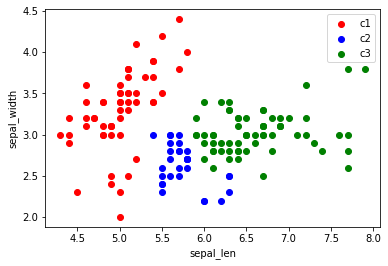

In [9]:
n_clusters = 3
colors = ['red', 'blue', 'green']

for i in range(n_clusters):
    df_c = df[ cls==i+1 ]
    c = colors[i]
    label = 'c{}'.format(i+1)
    plt.scatter(df_c['sepal_len'], df_c['sepal_width'], color=c, label=label)

plt.xlabel('sepal_len')
plt.ylabel('sepal_width')
plt.legend()
plt.show()